In [159]:
import pandas as pd 
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.metrics import roc_auc_score, auc, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable as pt

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
smote_x = pd.read_csv('smote_x.csv')
smote_y = pd.read_csv('smote_y.csv')

In [5]:
over_x = pd.read_csv('randomover_x.csv')
over_y = pd.read_csv('randomover_y.csv')

In [6]:
under_x = pd.read_csv('randomunder_x.csv')
under_y = pd.read_csv('randomunder_y.csv')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_smote_x, test_smote_x, train_smote_y, test_smote_y = train_test_split(smote_x, smote_y, test_size=0.3)

In [9]:
train_over_x, test_over_x, train_over_y, test_over_y = train_test_split(over_x, over_y, test_size=0.3)

In [10]:
train_under_x, test_under_x, train_under_y, test_under_y = train_test_split(under_x, under_y, test_size=0.3)

#KNN : SMOTE

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_smote_x.values, train_smote_y.values.ravel())

KNeighborsClassifier()

In [ ]:
smote_pred = knn.predict(test_smote_x.values)

In [ ]:
np.save('smote_pred', smote_pred)

In [14]:
smote_proba = knn.predict_proba(test_smote_x.values)

In [45]:
auc_score1 = roc_auc_score(test_smote_y.values, smote_proba[:,1])
auc_score1

0.9836063388575778

In [49]:
fpr1, tpr1, thresh1 = roc_curve(test_smote_y.values, smote_proba[:,1])

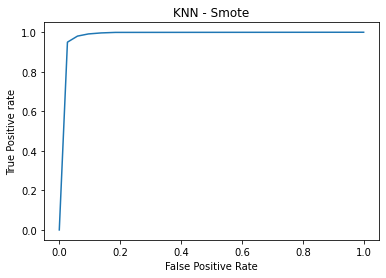

In [60]:
plt.plot(fpr1, tpr1)
plt.title('KNN - Smote')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.show();

In [52]:
smote_pred = np.load('smote_pred.npy')

In [157]:
f1_score1 = f1_score(test_smote_y.values, smote_pred, average=None)
f1_score1

array([0.47738979, 0.52018377])

[]

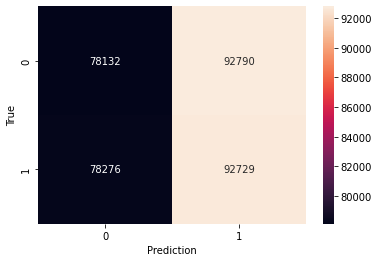

In [56]:
smote_knn_confusion = confusion_matrix(test_smote_y.values, smote_pred)
sns.heatmap(smote_knn_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#KNN : Random Over Sampling

In [15]:
knn2 = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn2.fit(train_over_x.values, train_over_y.values.ravel())

KNeighborsClassifier()

In [ ]:
over_pred = knn2.predict(test_over_x.values)

In [ ]:
np.save('over_pred', over_pred)

In [17]:
over_proba = knn2.predict_proba(test_over_x.values)

In [57]:
auc_score2 = roc_auc_score(test_over_y.values, over_proba[:,1])
auc_score2

0.9893192956128215

In [58]:
fpr2, tpr2, thresh2 = roc_curve(test_over_y.values, over_proba[:,1])

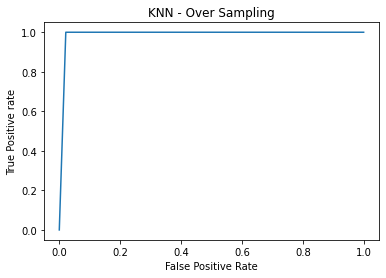

In [59]:
plt.plot(fpr2, tpr2)
plt.title('KNN - Over Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [61]:
over_pred = np.load('over_pred.npy')

In [156]:
f1_score2 = f1_score(test_over_y.values, over_pred, average=None)
f1_score2

array([0.48246612, 0.51641482])

[]

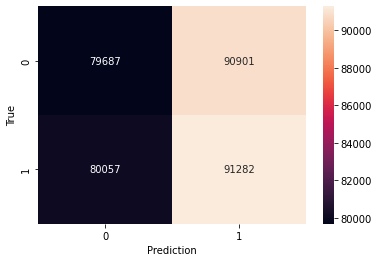

In [63]:
over_knn_confusion = confusion_matrix(test_over_y.values, over_pred)
sns.heatmap(over_knn_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#KNN : Random Under Sampling

In [18]:
knn3 = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn3.fit(train_under_x.values, train_under_y.values.ravel())

KNeighborsClassifier()

In [ ]:
under_pred = knn3.predict(test_under_x.values)

In [ ]:
np.save('under_pred', under_pred)

In [20]:
under_proba = knn3.predict_proba(test_under_x.values)

In [64]:
auc_score3 = roc_auc_score(test_under_y.values, under_proba[:,1])
auc_score3

0.8365895558123315

In [65]:
fpr3, tpr3, thresh3 = roc_curve(test_under_y.values, under_proba[:,1])

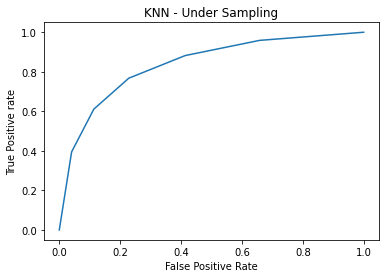

In [72]:
plt.plot(fpr3, tpr3)
plt.title('KNN - Under Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [67]:
under_pred = np.load('under_pred.npy')

In [155]:
f1_score3 = f1_score(test_under_y.values, under_pred, average=None)
f1_score3

array([0.51312555, 0.49626651])

[]

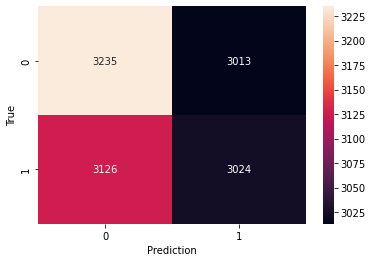

In [69]:
under_knn_confusion = confusion_matrix(test_under_y.values, under_pred)
sns.heatmap(under_knn_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Gaussian Naive Bayes : SMOTE

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gnb = GaussianNB()
gnb.fit(train_smote_x.values, train_smote_y.values.ravel())

GaussianNB()

In [ ]:
smote_pred_gnb = gnb.predict(test_smote_x.values)

In [ ]:
np.save('smote_pred_gnb', smote_pred_gnb)

In [23]:
smote_proba_gnb = gnb.predict_proba(test_smote_x.values)

In [70]:
auc_score4 = roc_auc_score(test_smote_y.values, smote_proba_gnb[:,1])
auc_score4

0.6993754997476076

In [71]:
fpr4, tpr4, thresh4 = roc_curve(test_smote_y.values, smote_proba_gnb[:,1])

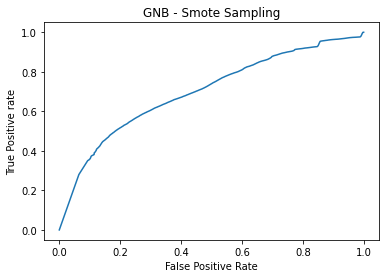

In [73]:
plt.plot(fpr4, tpr4)
plt.title('GNB - Smote Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [74]:
smote_pred_gnb = np.load('smote_pred_gnb.npy')

In [154]:
f1_score4 = f1_score(test_smote_y.values, smote_pred_gnb, average=None)
f1_score4

array([0.16549825, 0.64315328])

[]

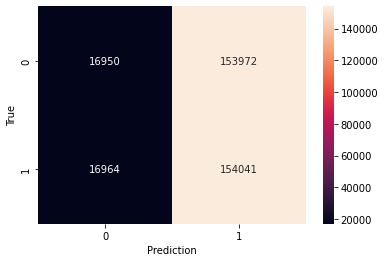

In [76]:
smote_gnb_confusion = confusion_matrix(test_smote_y.values, smote_pred_gnb)
sns.heatmap(smote_gnb_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Gaussian Naive Bayes : Random Over Sampling

In [24]:
gnb2 = GaussianNB()
gnb2.fit(train_over_x.values, train_over_y.values.ravel())

GaussianNB()

In [ ]:
over_pred_gnb = gnb2.predict(test_over_x.values)

In [ ]:
np.save('over_pred_gnb', over_pred_gnb)

In [25]:
over_proba_gnb = gnb2.predict_proba(test_over_x.values)

In [77]:
auc_score5 = roc_auc_score(test_over_y.values, over_proba_gnb[:,1])
auc_score5

0.6967449814671772

In [78]:
fpr5, tpr5, thresh5 = roc_curve(test_over_y.values, over_proba_gnb[:,1])

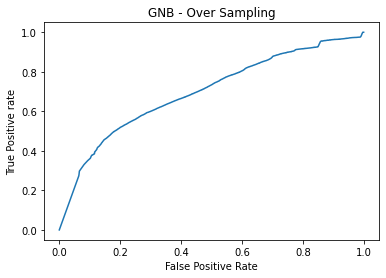

In [79]:
plt.plot(fpr5, tpr5)
plt.title('GNB - Over Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [80]:
over_pred_gnb = np.load('over_pred_gnb.npy')

In [153]:
f1_score5 = f1_score(test_over_y.values, over_pred_gnb, average=None)
f1_score5

array([0.16631561, 0.64403179])

[]

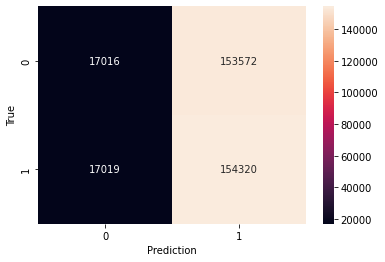

In [82]:
over_gnb_confusion = confusion_matrix(test_over_y.values, over_pred_gnb)
sns.heatmap(over_gnb_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Gaussian Naive Bayes : Random Under Sampling

In [26]:
gnb3 = GaussianNB()
gnb3.fit(train_under_x.values, train_under_y.values.ravel())

GaussianNB()

In [ ]:
under_pred_gnb = gnb3.predict(test_under_x.values)

In [ ]:
np.save('under_pred_gnb', under_pred_gnb)

In [27]:
under_proba_gnb = gnb3.predict_proba(test_under_x.values)

In [83]:
auc_score6 = roc_auc_score(test_under_y.values, under_proba_gnb[:,1])
auc_score6

0.6925967724305924

In [84]:
fpr6, tpr6, thresh6 = roc_curve(test_under_y.values, under_proba_gnb[:,1])

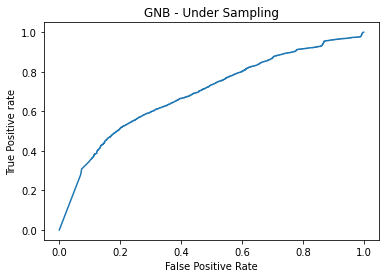

In [85]:
plt.plot(fpr6, tpr6)
plt.title('GNB - Under Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [86]:
under_pred_gnb = np.load('under_pred_gnb.npy')

In [152]:
f1_score6 = f1_score(test_under_y.values, under_pred_gnb, average=None)
f1_score6

array([0.16171129, 0.64113344])

[]

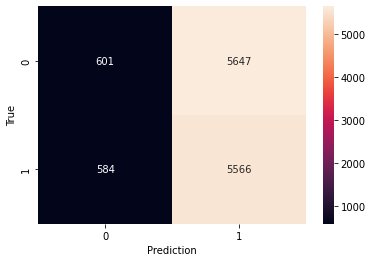

In [88]:
under_gnb_confusion = confusion_matrix(test_under_y.values, under_pred_gnb)
sns.heatmap(under_gnb_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Logistic Regression : SMOTE

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(max_iter=500)

In [30]:
lr.fit(train_smote_x.values, train_smote_y.values.ravel())

LogisticRegression(max_iter=500)

In [ ]:
smote_pred_lr = lr.predict(test_smote_x.values)

In [ ]:
np.save('smote_pred_lr', smote_pred_lr)

In [31]:
smote_proba_lr = lr.predict_proba(test_smote_x.values)

In [89]:
auc_score7 = roc_auc_score(test_smote_y.values, smote_proba_lr[:,1])
auc_score7

0.7393680382878657

In [90]:
fpr7, tpr7, thresh7 = roc_curve(test_smote_y.values, smote_proba_lr[:,1])

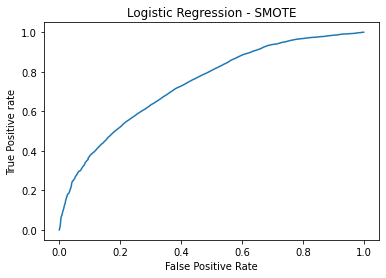

In [91]:
plt.plot(fpr7, tpr7)
plt.title('Logistic Regression - SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [92]:
smote_pred_lr = np.load('smote_pred_lr.npy')

In [151]:
f1_score7 = f1_score(test_smote_y.values, smote_pred_lr, average=None)
f1_score7

array([0.5395566 , 0.45296252])

[]

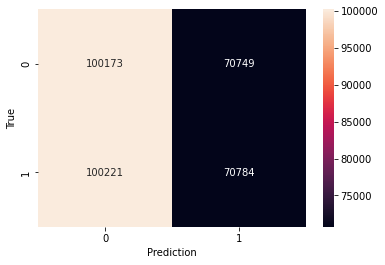

In [94]:
smote_lr_confusion = confusion_matrix(test_smote_y.values, smote_pred_lr)
sns.heatmap(smote_lr_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Logistic Regression : Random Over Sampling

In [32]:
lr2 = LogisticRegression(max_iter=500)
lr2.fit(train_over_x.values, train_over_y.values.ravel())

LogisticRegression(max_iter=500)

In [ ]:
over_pred_lr = lr2.predict(test_over_x.values)

In [ ]:
np.save('over_pred_lr', over_pred_lr)

In [33]:
over_proba_lr = lr2.predict_proba(test_over_x.values)

In [95]:
auc_score8 = roc_auc_score(test_over_y.values, over_proba_lr[:,1])
auc_score8

0.7446040000712826

In [96]:
fpr8, tpr8, thresh8 = roc_curve(test_over_y.values, over_proba_lr[:,1])

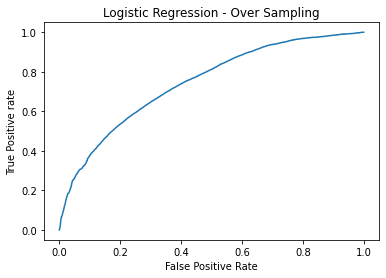

In [97]:
plt.plot(fpr8, tpr8)
plt.title('Logistic Regression - Over Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [98]:
over_pred_lr = np.load('over_pred_lr.npy')

In [150]:
f1_score8 = f1_score(test_over_y.values, over_pred_lr, average=None)
f1_score8

array([0.53335117, 0.46191143])

[]

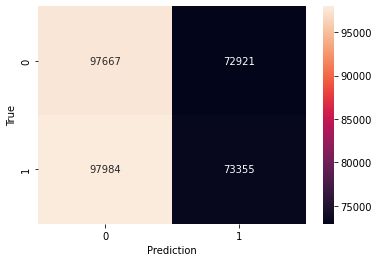

In [100]:
over_lr_confusion = confusion_matrix(test_over_y.values, over_pred_lr)
sns.heatmap(over_lr_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#Logistic Regression : Random Under Sampling

In [34]:
lr3 = LogisticRegression(max_iter=500)
lr3.fit(train_under_x.values, train_under_y.values.ravel())

LogisticRegression(max_iter=500)

In [ ]:
under_pred_lr = lr3.predict(test_under_x.values)

In [ ]:
np.save('under_pred_lr', under_pred_lr)

In [35]:
under_proba_lr = lr3.predict_proba(test_under_x.values)

In [101]:
auc_score9 = roc_auc_score(test_under_y.values, under_proba_lr[:,1])
auc_score9

0.7373459604634458

In [102]:
fpr9, tpr9, thresh9 = roc_curve(test_under_y.values, under_proba_lr[:,1])

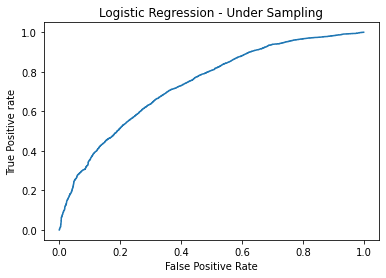

In [103]:
plt.plot(fpr9, tpr9)
plt.title('Logistic Regression - Under Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [104]:
under_pred_lr = np.load('under_pred_lr.npy')

In [149]:
f1_score9 = f1_score(test_under_y.values, under_pred_lr, average=None)
f1_score9

array([0.53609656, 0.47423213])

[]

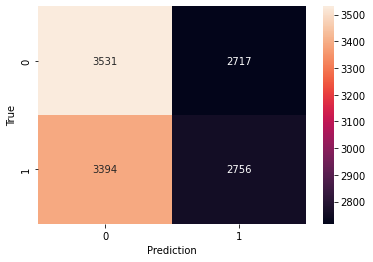

In [106]:
under_lr_confusion = confusion_matrix(test_under_y.values, under_pred_lr)
sns.heatmap(under_lr_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#RandomSearchCV : XGBOOST on SMOTE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

clfxg = xgboost.XGBClassifier()

In [ ]:
param = {'n_estimators': [1000, 1500, 2000],
              'learning_rate': [0.01, 0.02, 0.03],
              'max_depth': [11, 12, 13],
              'colsample_bytree': [0.4, 0.3],
             }

In [ ]:
clf = RandomizedSearchCV(clfxg, param, cv = 3, scoring = 'roc_auc') #using auc as metric because data is balanced
clf.fit(train_smote_x.values, train_smote_y.values.ravel())

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.4, 0.3],
                                        'learning_rate': [0.01, 0.02, 0.03],
                                        'max_depth': [11, 12, 13],
                                        'n_estimators': [1000, 1500, 2000]},
                   scoring='roc_auc')

In [ ]:
clf.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.02,
 'max_depth': 11,
 'n_estimators': 1000}

#XGBOOST : SMOTE

In [ ]:
clfy = xgboost.XGBClassifier(
            n_estimators=1000,
            max_depth=11,
            learning_rate=0.02,
            colsample_bytree=0.4,
            eval_metric='auc', 
        )                                                                       #using auc as metric because data is balanced

In [ ]:
clfy.fit(train_smote_x.values, train_smote_y.values.ravel())

XGBClassifier(colsample_bytree=0.4, eval_metric='auc', learning_rate=0.02,
              max_depth=11, n_estimators=1000)

In [ ]:
result = clfy.predict(test_smote_x.values)

In [ ]:
np.save('smote_result', result)

In [ ]:
pickle.dump(clfy, open("smote_xgboost.dat", "wb"))

In [37]:
smote_xg = pickle.load(open("smote_xgboost.dat", "rb"))

In [38]:
smote_proba_xg = smote_xg.predict_proba(test_smote_x.values)

In [107]:
auc_score10 = roc_auc_score(test_smote_y.values, smote_proba_xg[:,1])
auc_score10

0.9994348099419337

In [108]:
fpr10, tpr10, thresh10 = roc_curve(test_smote_y.values, smote_proba_xg[:,1])

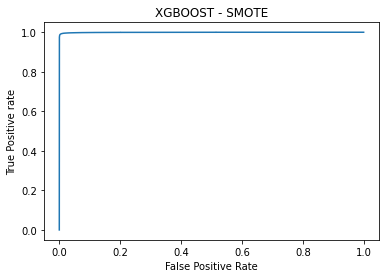

In [109]:
plt.plot(fpr10, tpr10)
plt.title('XGBOOST - SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [110]:
smote_pred_xg = np.load('smote_result.npy')

In [148]:
f1_score10 = f1_score(test_smote_y.values, smote_pred_xg, average=None)
f1_score10

array([0.503035  , 0.49555504])

[]

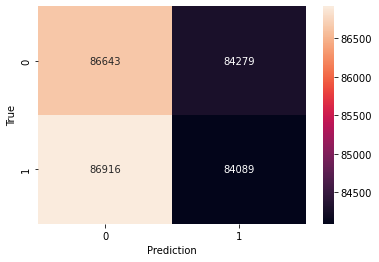

In [112]:
smote_xg_confusion = confusion_matrix(test_smote_y.values, smote_pred_xg)
sns.heatmap(smote_xg_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#XGBOOST: Random Over Sampling

In [ ]:
clfy2 = xgboost.XGBClassifier(
            n_estimators=1000,
            max_depth=11,
            learning_rate=0.02,
            colsample_bytree=0.4,
            eval_metric='auc', 
        )        

In [ ]:
clfy2.fit(train_over_x.values, train_over_y.values.ravel())

XGBClassifier(colsample_bytree=0.4, eval_metric='auc', learning_rate=0.02,
              max_depth=11, n_estimators=1000)

In [ ]:
result2 = clfy2.predict(test_over_x.values)

In [ ]:
np.save('over_result', result2)

In [ ]:
pickle.dump(clfy2, open("over_xgboost.dat", "wb"))

In [39]:
over_xg = pickle.load(open("over_xgboost.dat", "rb"))

In [40]:
over_proba_xg = over_xg.predict_proba(test_over_x.values)

In [113]:
auc_score11 = roc_auc_score(test_over_y.values, over_proba_xg[:,1])
auc_score11

0.9984755895445753

In [114]:
fpr11, tpr11, thresh11 = roc_curve(test_over_y.values, over_proba_xg[:,1])

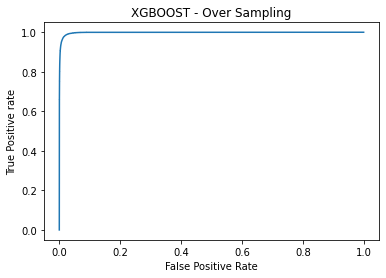

In [115]:
plt.plot(fpr11, tpr11)
plt.title('XGBOOST - Over Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [116]:
over_pred_xg = np.load('over_result.npy')

In [147]:
f1_score11 = f1_score(test_over_y.values, over_pred_xg, average=None)
f1_score11

array([0.49800701, 0.50014884])

[]

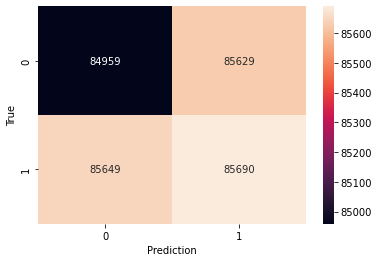

In [118]:
over_xg_confusion = confusion_matrix(test_over_y.values, over_pred_xg)
sns.heatmap(over_xg_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#XGBOOST: Random Under Sampling

In [ ]:
clfy3 = xgboost.XGBClassifier(
            n_estimators=1000,
            max_depth=11,
            learning_rate=0.02,
            colsample_bytree=0.4,
            eval_metric='auc', 
        )        

In [ ]:
clfy3.fit(train_under_x.values, train_under_y.values.ravel())

XGBClassifier(colsample_bytree=0.4, eval_metric='auc', learning_rate=0.02,
              max_depth=11, n_estimators=1000)

In [ ]:
result3 = clfy3.predict(test_under_x.values)

In [ ]:
np.save('under_result', result3)

In [ ]:
pickle.dump(clfy3, open("under_xgboost.dat", "wb"))

In [41]:
under_xg = pickle.load(open("under_xgboost.dat", "rb"))

In [42]:
under_proba_xg = under_xg.predict_proba(test_under_x.values)

In [119]:
auc_score12 = roc_auc_score(test_under_y.values, under_proba_xg[:,1])
auc_score12

0.99081870751486

In [120]:
fpr12, tpr12, thresh12 = roc_curve(test_under_y.values, under_proba_xg[:,1])

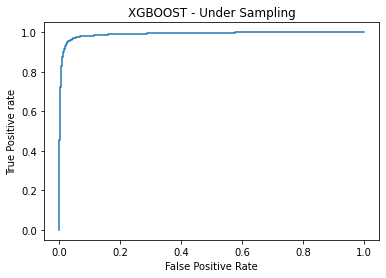

In [121]:
plt.plot(fpr12, tpr12)
plt.title('XGBOOST - Under Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [122]:
under_pred_xg = np.load('under_result.npy')

In [146]:
f1_score12 = f1_score(test_under_y.values, under_pred_xg, average=None)
f1_score12

array([0.511277 , 0.4957391])

[]

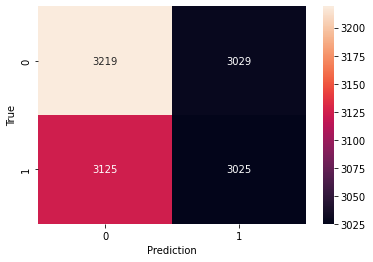

In [125]:
under_xg_confusion = confusion_matrix(test_under_y.values, under_pred_xg)
sns.heatmap(under_xg_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

#No sampling: XGBOOST

In [ ]:
import xgboost 
clxgb = xgboost.XGBClassifier(
            n_estimators=1000,
            max_depth=11,
            learning_rate=0.02,
            colsample_bytree=0.4,
            eval_metric='auc', 
        )        

In [127]:
train = pd.read_csv('pre_bal_train2.csv')

In [128]:
cols_l = train.columns
cols_l = cols_l.to_list()

In [129]:
cols_l.remove('isFraud')
cols_l.remove('uid')

In [130]:
percent_missing = train.isnull().sum() * 100 / len(train)                        #calculating percentage missing values in columns and then making a dataframe from it
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [131]:
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [132]:
missing_value_df[:15]    #missing values in all the standard deviation calculated features

,column_name,percent_missing
C14std,C14std,0.001693
V318std,V318std,0.001693
V45std,V45std,0.001693
C13std,C13std,0.001693
C1std,C1std,0.001693
V40std,V40std,0.001693
C7std,C7std,0.001693
V79std,V79std,0.001693
C2std,C2std,0.001693
V317std,V317std,0.001693


In [133]:
rev = []
for yt in range(len(missing_value_df)):
     if missing_value_df['percent_missing'][yt] != 0:
        rev.append(missing_value_df['column_name'][yt])

In [134]:
cols_l = list(set(cols_l) - set(rev))         #removing columns containing missing values

In [135]:
trai = train[cols_l].astype(float)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
tr_x, te_x, tr_y, te_y = train_test_split(trai, train['isFraud'], test_size=0.3)

In [ ]:
clxgb.fit(tr_x.values, tr_y.values.ravel())

XGBClassifier(colsample_bytree=0.4, eval_metric='auc', learning_rate=0.02,
              max_depth=11, n_estimators=1000)

In [ ]:
pickle.dump(clxgb, open("no_smote_xgboost.dat", "wb"))

In [126]:
loaded_model = pickle.load(open("no_smote_xgboost.dat", 'rb'))

In [ ]:
result4 = loaded_model.predict(te_x.values)

In [ ]:
np.save('no_smote_xg', result4)

In [138]:
no_smote_proba_xg = loaded_model.predict_proba(te_x.values)

In [139]:
auc_score13 = roc_auc_score(te_y.values, no_smote_proba_xg[:,1])
auc_score13

0.5820752682769319

In [140]:
fpr13, tpr13, thresh13 = roc_curve(te_y.values, no_smote_proba_xg[:,1])

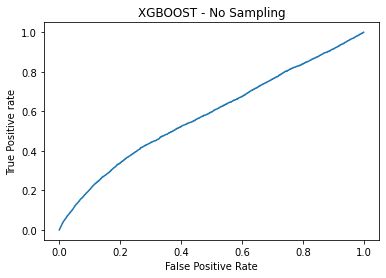

In [141]:
plt.plot(fpr13, tpr13)
plt.title('XGBOOST - No Sampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

In [142]:
no_smote_pred_xg = np.load('no_smote_xg.npy')

In [145]:
f1_score13 = f1_score(te_y.values, no_smote_pred_xg, average=None)
f1_score13

array([0.96866889, 0.02713704])

[]

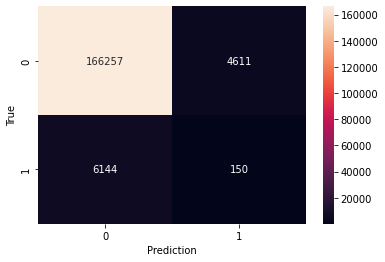

In [144]:
no_smote_xg_confusion = confusion_matrix(te_y.values, no_smote_pred_xg)
sns.heatmap(no_smote_xg_confusion, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.plot()

# Cumulative results

In [177]:
result_table = pt(['Model Name', 'isNotFraud - F1 score', 'isFraud - F1 score'])

In [178]:
result_table.add_row(['KNN - SMOTE', round(f1_score1[0], ndigits=3), round(f1_score1[1], ndigits=3)])
result_table.add_row(['KNN - Over Sampling', round(f1_score2[0], ndigits=3), round(f1_score2[1], ndigits=3)])
result_table.add_row(['KNN - Under Sampling', round(f1_score3[0], ndigits=3), round(f1_score3[1], ndigits=3)])

In [179]:
result_table.add_row(['GNB - SMOTE', round(f1_score4[0], ndigits=3), round(f1_score4[1], ndigits=3)])
result_table.add_row(['GNB - Over Sampling', round(f1_score5[0], ndigits=3), round(f1_score5[1], ndigits=3)])
result_table.add_row(['GNB - Under Sampling', round(f1_score6[0], ndigits=3), round(f1_score6[1], ndigits=3)])

In [180]:
result_table.add_row(['LR - SMOTE', round(f1_score7[0], ndigits=3), round(f1_score7[1], ndigits=3)])
result_table.add_row(['LR - Over Sampling', round(f1_score8[0], ndigits=3), round(f1_score8[1], ndigits=3)])
result_table.add_row(['LR - Under Sampling', round(f1_score9[0], ndigits=3), round(f1_score9[1], ndigits=3)])

In [181]:
result_table.add_row(['XGBOOST - SMOTE', round(f1_score10[0], ndigits=3), round(f1_score10[1], ndigits=3)])
result_table.add_row(['XGBOOST - Over Sampling', round(f1_score11[0], ndigits=3), round(f1_score11[1], ndigits=3)])
result_table.add_row(['XGBOOST - Under Sampling', round(f1_score12[0], ndigits=3), round(f1_score12[1], ndigits=3)])

In [182]:
result_table.add_row(['XGBOOST - No Sampling', round(f1_score13[0], ndigits=3), round(f1_score13[1], ndigits=3)])

In [183]:
print(result_table)

+--------------------------+-----------------------+--------------------+
|        Model Name        | isNotFraud - F1 score | isFraud - F1 score |
+--------------------------+-----------------------+--------------------+
|       KNN - SMOTE        |         0.477         |        0.52        |
|   KNN - Over Sampling    |         0.482         |       0.516        |
|   KNN - Under Sampling   |         0.513         |       0.496        |
|       GNB - SMOTE        |         0.165         |       0.643        |
|   GNB - Over Sampling    |         0.166         |       0.644        |
|   GNB - Under Sampling   |         0.162         |       0.641        |
|        LR - SMOTE        |          0.54         |       0.453        |
|    LR - Over Sampling    |         0.533         |       0.462        |
|   LR - Under Sampling    |         0.536         |       0.474        |
|     XGBOOST - SMOTE      |         0.503         |       0.496        |
| XGBOOST - Over Sampling  |         0

XGBOOST is doing well in classfying not fraud transactions without sampling and GNB is the best amongst all is classfying the fraud transactions. So, a mix these two could produce good results. 